<center><h1>Mini Project 5</h1></center>
<br>
<center><font size="5">Name - Spandan Patil</font></center>
<br>
<center><font size="4">Accute Inamations Data</font></center>

## 1. Decision Trees as Interpretable Models

Import packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.impute import KNNImputer
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import xgboost as xgb

### (a) Obtain Data

Get the Accute Inamations Data Set

In [63]:
# Here we are defining the names of all the columns
cols = ["Temp", "Nausea", "Lumbar_pain", "Urine_pushing", "Micturition_pains", "Burning", "Inflammation", "Nephritis"]

# Here we are defining the list of input features.
feature_names = ["Temp", "Nausea", "Lumbar_pain", "Urine_pushing", "Micturition_pains", "Burning"]

# Here we are reading the dataset file and storing it in a dataframe.
dataset = pd.read_csv("../data/diagnosis.csv", sep=r"\s+", names=cols, header=None, encoding="utf-16")
# Here we are replacing the , separator with . for the denotion of decimal points in the temp field.
dataset["Temp"] = dataset["Temp"].apply(lambda x: x.replace(",", "."))
dataset

,Temp,Nausea,Lumbar_pain,Urine_pushing,Micturition_pains,Burning,Inflammation,Nephritis
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes,no,yes
116,41.5,no,no,no,no,no,no,no
117,41.5,yes,yes,no,yes,no,no,yes
118,41.5,no,yes,yes,no,yes,no,yes


In [64]:
# Since our decision tree need numeric datapoints, so we are label encoding the yes and no labels to 1 and 0 respectively. 
encoder = LabelEncoder()

for col in ["Nausea", "Lumbar_pain", "Urine_pushing", "Micturition_pains", "Burning"]:
    dataset[col] = encoder.fit_transform(dataset[col])
    
dataset

,Temp,Nausea,Lumbar_pain,Urine_pushing,Micturition_pains,Burning,Inflammation,Nephritis
0,35.5,0,1,0,0,0,no,no
1,35.9,0,0,1,1,1,yes,no
2,35.9,0,1,0,0,0,no,no
3,36.0,0,0,1,1,1,yes,no
4,36.0,0,1,0,0,0,no,no
...,...,...,...,...,...,...,...,...
115,41.4,0,1,1,0,1,no,yes
116,41.5,0,0,0,0,0,no,no
117,41.5,1,1,0,1,0,no,yes
118,41.5,0,1,1,0,1,no,yes


In [65]:
# Since our decision Tree classifier doesn't support multi-label classification, so using power set method we are joining the labels of our inflamation and nephritis output fields to a single new label output, thus converting our case to a multi-class problem.
dataset["label"] = "Inflammation : " + dataset["Inflammation"] + ", " + "Nephritis : " + dataset["Nephritis"]
dataset

,Temp,Nausea,Lumbar_pain,Urine_pushing,Micturition_pains,Burning,Inflammation,Nephritis,label
0,35.5,0,1,0,0,0,no,no,"Inflammation : no, Nephritis : no"
1,35.9,0,0,1,1,1,yes,no,"Inflammation : yes, Nephritis : no"
2,35.9,0,1,0,0,0,no,no,"Inflammation : no, Nephritis : no"
3,36.0,0,0,1,1,1,yes,no,"Inflammation : yes, Nephritis : no"
4,36.0,0,1,0,0,0,no,no,"Inflammation : no, Nephritis : no"
...,...,...,...,...,...,...,...,...,...
115,41.4,0,1,1,0,1,no,yes,"Inflammation : no, Nephritis : yes"
116,41.5,0,0,0,0,0,no,no,"Inflammation : no, Nephritis : no"
117,41.5,1,1,0,1,0,no,yes,"Inflammation : no, Nephritis : yes"
118,41.5,0,1,1,0,1,no,yes,"Inflammation : no, Nephritis : yes"


In [66]:
# Here we are splitting the dataset into input features and output features.
X = dataset[["Temp", "Nausea", "Lumbar_pain", "Urine_pushing", "Micturition_pains", "Burning"]]
y = dataset["label"]

### (b) Build a decision tree

In [67]:
# Here we are creating and fitting our decision tree classifier.
clf = DecisionTreeClassifier(random_state=21)
clf.fit(X, y)

DecisionTreeClassifier(random_state=21)

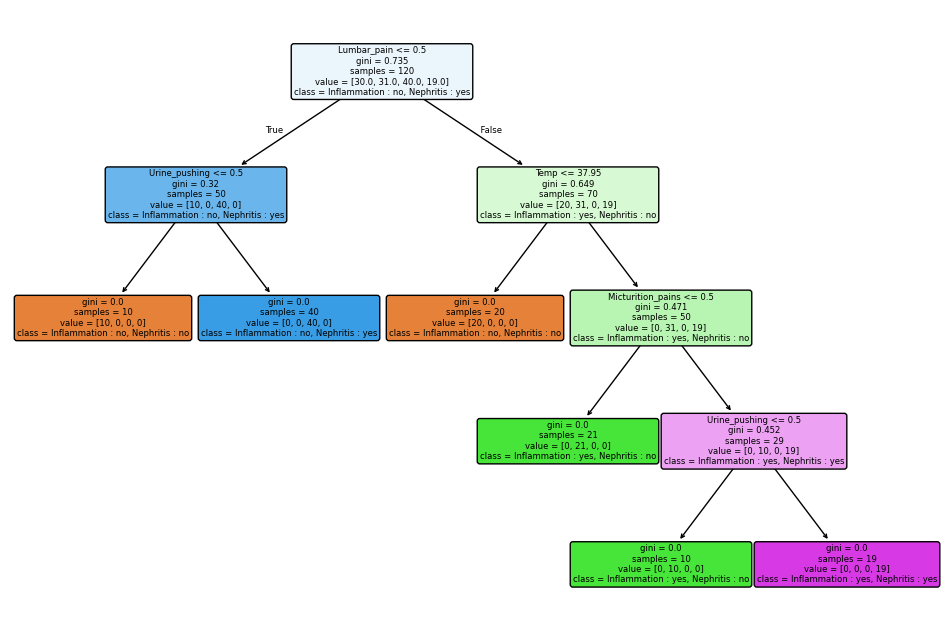

In [68]:
# Here we are plotting our decision tree classifier.
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, rounded=True, feature_names=feature_names, class_names=dataset["label"].unique())
plt.show()

### (c) Convert the decision rules

In [69]:
# This code is taken from https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html.
# In this code i have made some changes in the output print function where instead of displaying the distribution of the classes, i want printing the final output class.

def tree_to_pseudo(tree, feature_names, target_names):
	"""
	Outputs a decision tree model as if/then pseudocode
	
	Parameters:
	-----------
	tree: decision tree model
		The decision tree to represent as pseudocode
	feature_names: list
		The feature names of the dataset used for building the decision tree
	"""

	left = tree.tree_.children_left
	right = tree.tree_.children_right
	threshold = tree.tree_.threshold
	features = [feature_names[i] for i in tree.tree_.feature]
	value = tree.tree_.value
	
	def recurse(left, right, threshold, features, node, depth=0):
		indent = "  " * depth
		if (threshold[node] != -2):
			print(indent,"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
			if left[node] != -1:
				recurse (left, right, threshold, features, left[node], depth+1)
				print(indent,"} else {")
				if right[node] != -1:
					recurse (left, right, threshold, features, right[node], depth+1)
				print(indent,"}")
		else:
			# I have made the changes here instead of printing value[node], i am printing the final output class.
			print(indent,"return " + dataset["label"].unique()[np.argmax(value[node])])

	recurse(left, right, threshold, features, 0)

In [70]:
tree_to_pseudo(clf, feature_names, dataset["label"].unique())

 if ( Lumbar_pain <= 0.5 ) {
   if ( Urine_pushing <= 0.5 ) {
     return Inflammation : no, Nephritis : no
   } else {
     return Inflammation : no, Nephritis : yes
   }
 } else {
   if ( Temp <= 37.95000076293945 ) {
     return Inflammation : no, Nephritis : no
   } else {
     if ( Micturition_pains <= 0.5 ) {
       return Inflammation : yes, Nephritis : no
     } else {
       if ( Urine_pushing <= 0.5 ) {
         return Inflammation : yes, Nephritis : no
       } else {
         return Inflammation : yes, Nephritis : yes
       }
     }
   }
 }


### (d) Use cost-complexity pruning to find a minimal decision tree and a set of decisionrules with high interpretability.

In [71]:
# Here we are performing the cost-complexity pruning using the in-built function.
path = clf.cost_complexity_pruning_path(X, y)
# Here we are getting the list of best alpha values.
alpha_lst = path.ccp_alphas

# Here we are looping through all alpha values present in the list and using cross-validation to select the best one
best_alpha = None
best_acc = 0

for alpha in alpha_lst:
    temp_clf = DecisionTreeClassifier(random_state=21, ccp_alpha=alpha)
    temp_clf.fit(X, y)
    
    # Here we are using cross-validation to get the mean accuracy for this value of alpha
    acc = cross_val_score(temp_clf, X, y, cv=5).mean()
    if acc > best_acc:
        best_acc = acc
        best_alpha = alpha

print(best_alpha)

0.0


In [72]:
# Here we are training the final Decision Tree classifer on the best alpha selected.
final_clf = DecisionTreeClassifier(random_state=21, ccp_alpha=best_alpha)
final_clf.fit(X, y)

DecisionTreeClassifier(random_state=21)

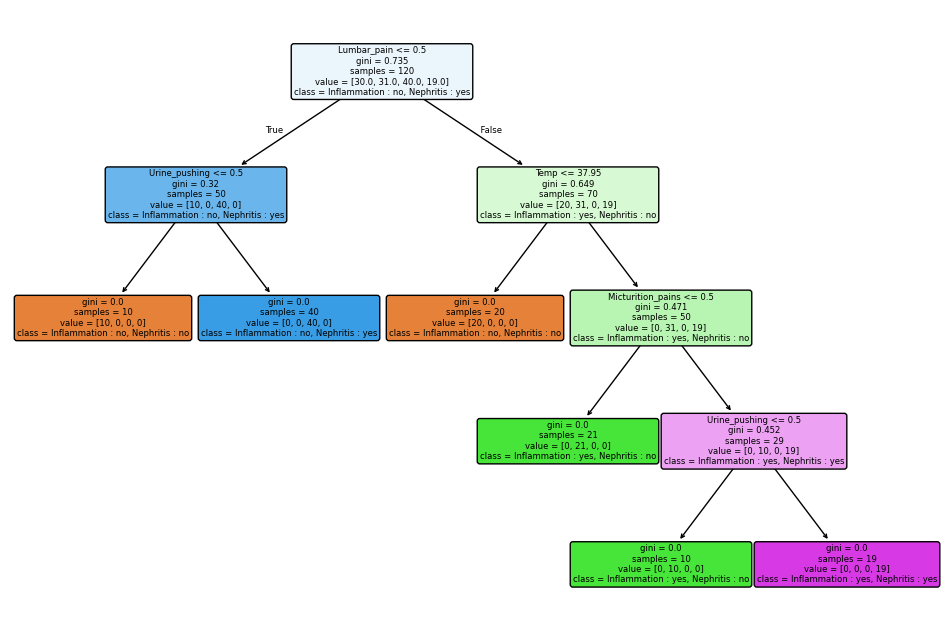

In [73]:
# Here we are plotting our final decision tree classifier.
plt.figure(figsize=(12, 8)) 
plot_tree(final_clf, filled=True, rounded=True, feature_names=feature_names, class_names=dataset["label"].unique())
plt.show()

In [74]:
tree_to_pseudo(final_clf, feature_names, dataset["label"].unique())

 if ( Lumbar_pain <= 0.5 ) {
   if ( Urine_pushing <= 0.5 ) {
     return Inflammation : no, Nephritis : no
   } else {
     return Inflammation : no, Nephritis : yes
   }
 } else {
   if ( Temp <= 37.95000076293945 ) {
     return Inflammation : no, Nephritis : no
   } else {
     if ( Micturition_pains <= 0.5 ) {
       return Inflammation : yes, Nephritis : no
     } else {
       if ( Urine_pushing <= 0.5 ) {
         return Inflammation : yes, Nephritis : no
       } else {
         return Inflammation : yes, Nephritis : yes
       }
     }
   }
 }


## 2. The LASSO and Boosting for Regression

### (a) Obtain Data

In [75]:
# This is the list of all the predictive input columns.
cols = [
    "population", "householdsize", "racepctblack", "racePctWhite", "racePctAsian", "racePctHisp",
    "agePct12t21", "agePct12t29", "agePct16t24", "agePct65up", "numbUrban", "pctUrban",
    "medIncome", "pctWWage", "pctWFarmSelf", "pctWInvInc", "pctWSocSec", "pctWPubAsst",
    "pctWRetire", "medFamInc", "perCapInc", "whitePerCap", "blackPerCap", "indianPerCap",
    "AsianPerCap", "OtherPerCap", "HispPerCap", "NumUnderPov", "PctPopUnderPov",
    "PctLess9thGrade", "PctNotHSGrad", "PctBSorMore", "PctUnemployed", "PctEmploy",
    "PctEmplManu", "PctEmplProfServ", "PctOccupManu", "PctOccupMgmtProf",
    "MalePctDivorce", "MalePctNevMarr", "FemalePctDiv", "TotalPctDiv", "PersPerFam",
    "PctFam2Par", "PctKids2Par", "PctYoungKids2Par", "PctTeen2Par", "PctWorkMomYoungKids",
    "PctWorkMom", "NumIlleg", "PctIlleg", "NumImmig", "PctImmigRecent", "PctImmigRec5",
    "PctImmigRec8", "PctImmigRec10", "PctRecentImmig", "PctRecImmig5", "PctRecImmig8",
    "PctRecImmig10", "PctSpeakEnglOnly", "PctNotSpeakEnglWell", "PctLargHouseFam",
    "PctLargHouseOccup", "PersPerOccupHous", "PersPerOwnOccHous", "PersPerRentOccHous",
    "PctPersOwnOccup", "PctPersDenseHous", "PctHousLess3BR", "MedNumBR", "HousVacant",
    "PctHousOccup", "PctHousOwnOcc", "PctVacantBoarded", "PctVacMore6Mos",
    "MedYrHousBuilt", "PctHousNoPhone", "PctWOFullPlumb", "OwnOccLowQuart",
    "OwnOccMedVal", "OwnOccHiQuart", "RentLowQ", "RentMedian", "RentHighQ", "MedRent",
    "MedRentPctHousInc", "MedOwnCostPctInc", "MedOwnCostPctIncNoMtg", "NumInShelters",
    "NumStreet", "PctForeignBorn", "PctBornSameState", "PctSameHouse85", "PctSameCity85",
    "PctSameState85", "LemasSwornFT", "LemasSwFTPerPop", "LemasSwFTFieldOps",
    "LemasSwFTFieldPerPop", "LemasTotalReq", "LemasTotReqPerPop", "PolicReqPerOffic",
    "PolicPerPop", "RacialMatchCommPol", "PctPolicWhite", "PctPolicBlack",
    "PctPolicHisp", "PctPolicAsian", "PctPolicMinor", "OfficAssgnDrugUnits",
    "NumKindsDrugsSeiz", "PolicAveOTWorked", "LandArea", "PopDens", "PctUsePubTrans",
    "PolicCars", "PolicOperBudg", "LemasPctPolicOnPatr", "LemasGangUnitDeploy",
    "LemasPctOfficDrugUn", "PolicBudgPerPop", "ViolentCrimesPerPop"
]


In [76]:
# Here we are reading our dataset file and loading it into a dataframe, we are skipping the first 5 columns as they are non-predictive features.
dataset = pd.read_csv("../data/communities.csv", header=None, usecols=range(5, 128), names=cols)
# Here we are replacing the ? with NaN value in our dataset.
dataset.replace("?", np.nan, inplace=True)
dataset.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [77]:
# Here we are printing the columns having NaN values and there counts.
NaN_counts = dataset.isnull().sum()
NaN_cols = NaN_counts[NaN_counts > 0]
print(NaN_cols)

OtherPerCap                1
LemasSwornFT            1675
LemasSwFTPerPop         1675
LemasSwFTFieldOps       1675
LemasSwFTFieldPerPop    1675
LemasTotalReq           1675
LemasTotReqPerPop       1675
PolicReqPerOffic        1675
PolicPerPop             1675
RacialMatchCommPol      1675
PctPolicWhite           1675
PctPolicBlack           1675
PctPolicHisp            1675
PctPolicAsian           1675
PctPolicMinor           1675
OfficAssgnDrugUnits     1675
NumKindsDrugsSeiz       1675
PolicAveOTWorked        1675
PolicCars               1675
PolicOperBudg           1675
LemasPctPolicOnPatr     1675
LemasGangUnitDeploy     1675
PolicBudgPerPop         1675
dtype: int64


In [78]:
# Here we are splitting the dataset into train and test sets. And then further into input and output features.
split_idx = 1495
train_set = dataset.iloc[:split_idx]
test_set = dataset.iloc[split_idx:]

### (b) Missing values

In [79]:
# For handling the missing values we are using the KNNImputer which will impute the missing values based on other datapoints which are similar to the data point in consideration.
imputer = KNNImputer(n_neighbors=5)
train_set = pd.DataFrame(imputer.fit_transform(train_set), columns=train_set.columns)
train_set.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060,0.040,0.900,0.5,0.32,0.140,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.132,0.052,0.832,0.5,0.00,0.230,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.152,0.040,0.748,0.8,0.00,0.296,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.054,0.022,0.846,0.3,0.00,0.142,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.044,0.020,0.708,0.0,0.00,0.332,0.03


In [80]:
test_set = pd.DataFrame(imputer.transform(test_set), columns=test_set.columns)
test_set.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,...,0.01,0.23,0.73,0.018,0.020,0.814,0.6,0.0,0.216,0.12
1,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.01,0.18,0.02,0.100,0.028,0.688,0.5,0.0,0.284,0.11
2,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.01,0.18,0.00,0.058,0.018,0.668,0.5,0.0,0.118,0.12
3,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.06,0.13,0.16,0.034,0.018,0.820,0.0,0.0,0.152,0.06
4,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.03,0.23,0.06,0.076,0.030,0.802,0.4,0.0,0.152,0.12


In [94]:
dataset_imputed = pd.concat([train_set, test_set])
dataset_imputed.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060,0.040,0.900,0.5,0.32,0.140,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.132,0.052,0.832,0.5,0.00,0.230,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.152,0.040,0.748,0.8,0.00,0.296,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.054,0.022,0.846,0.3,0.00,0.142,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.044,0.020,0.708,0.0,0.00,0.332,0.03


### (c) Plot a correlation matrix

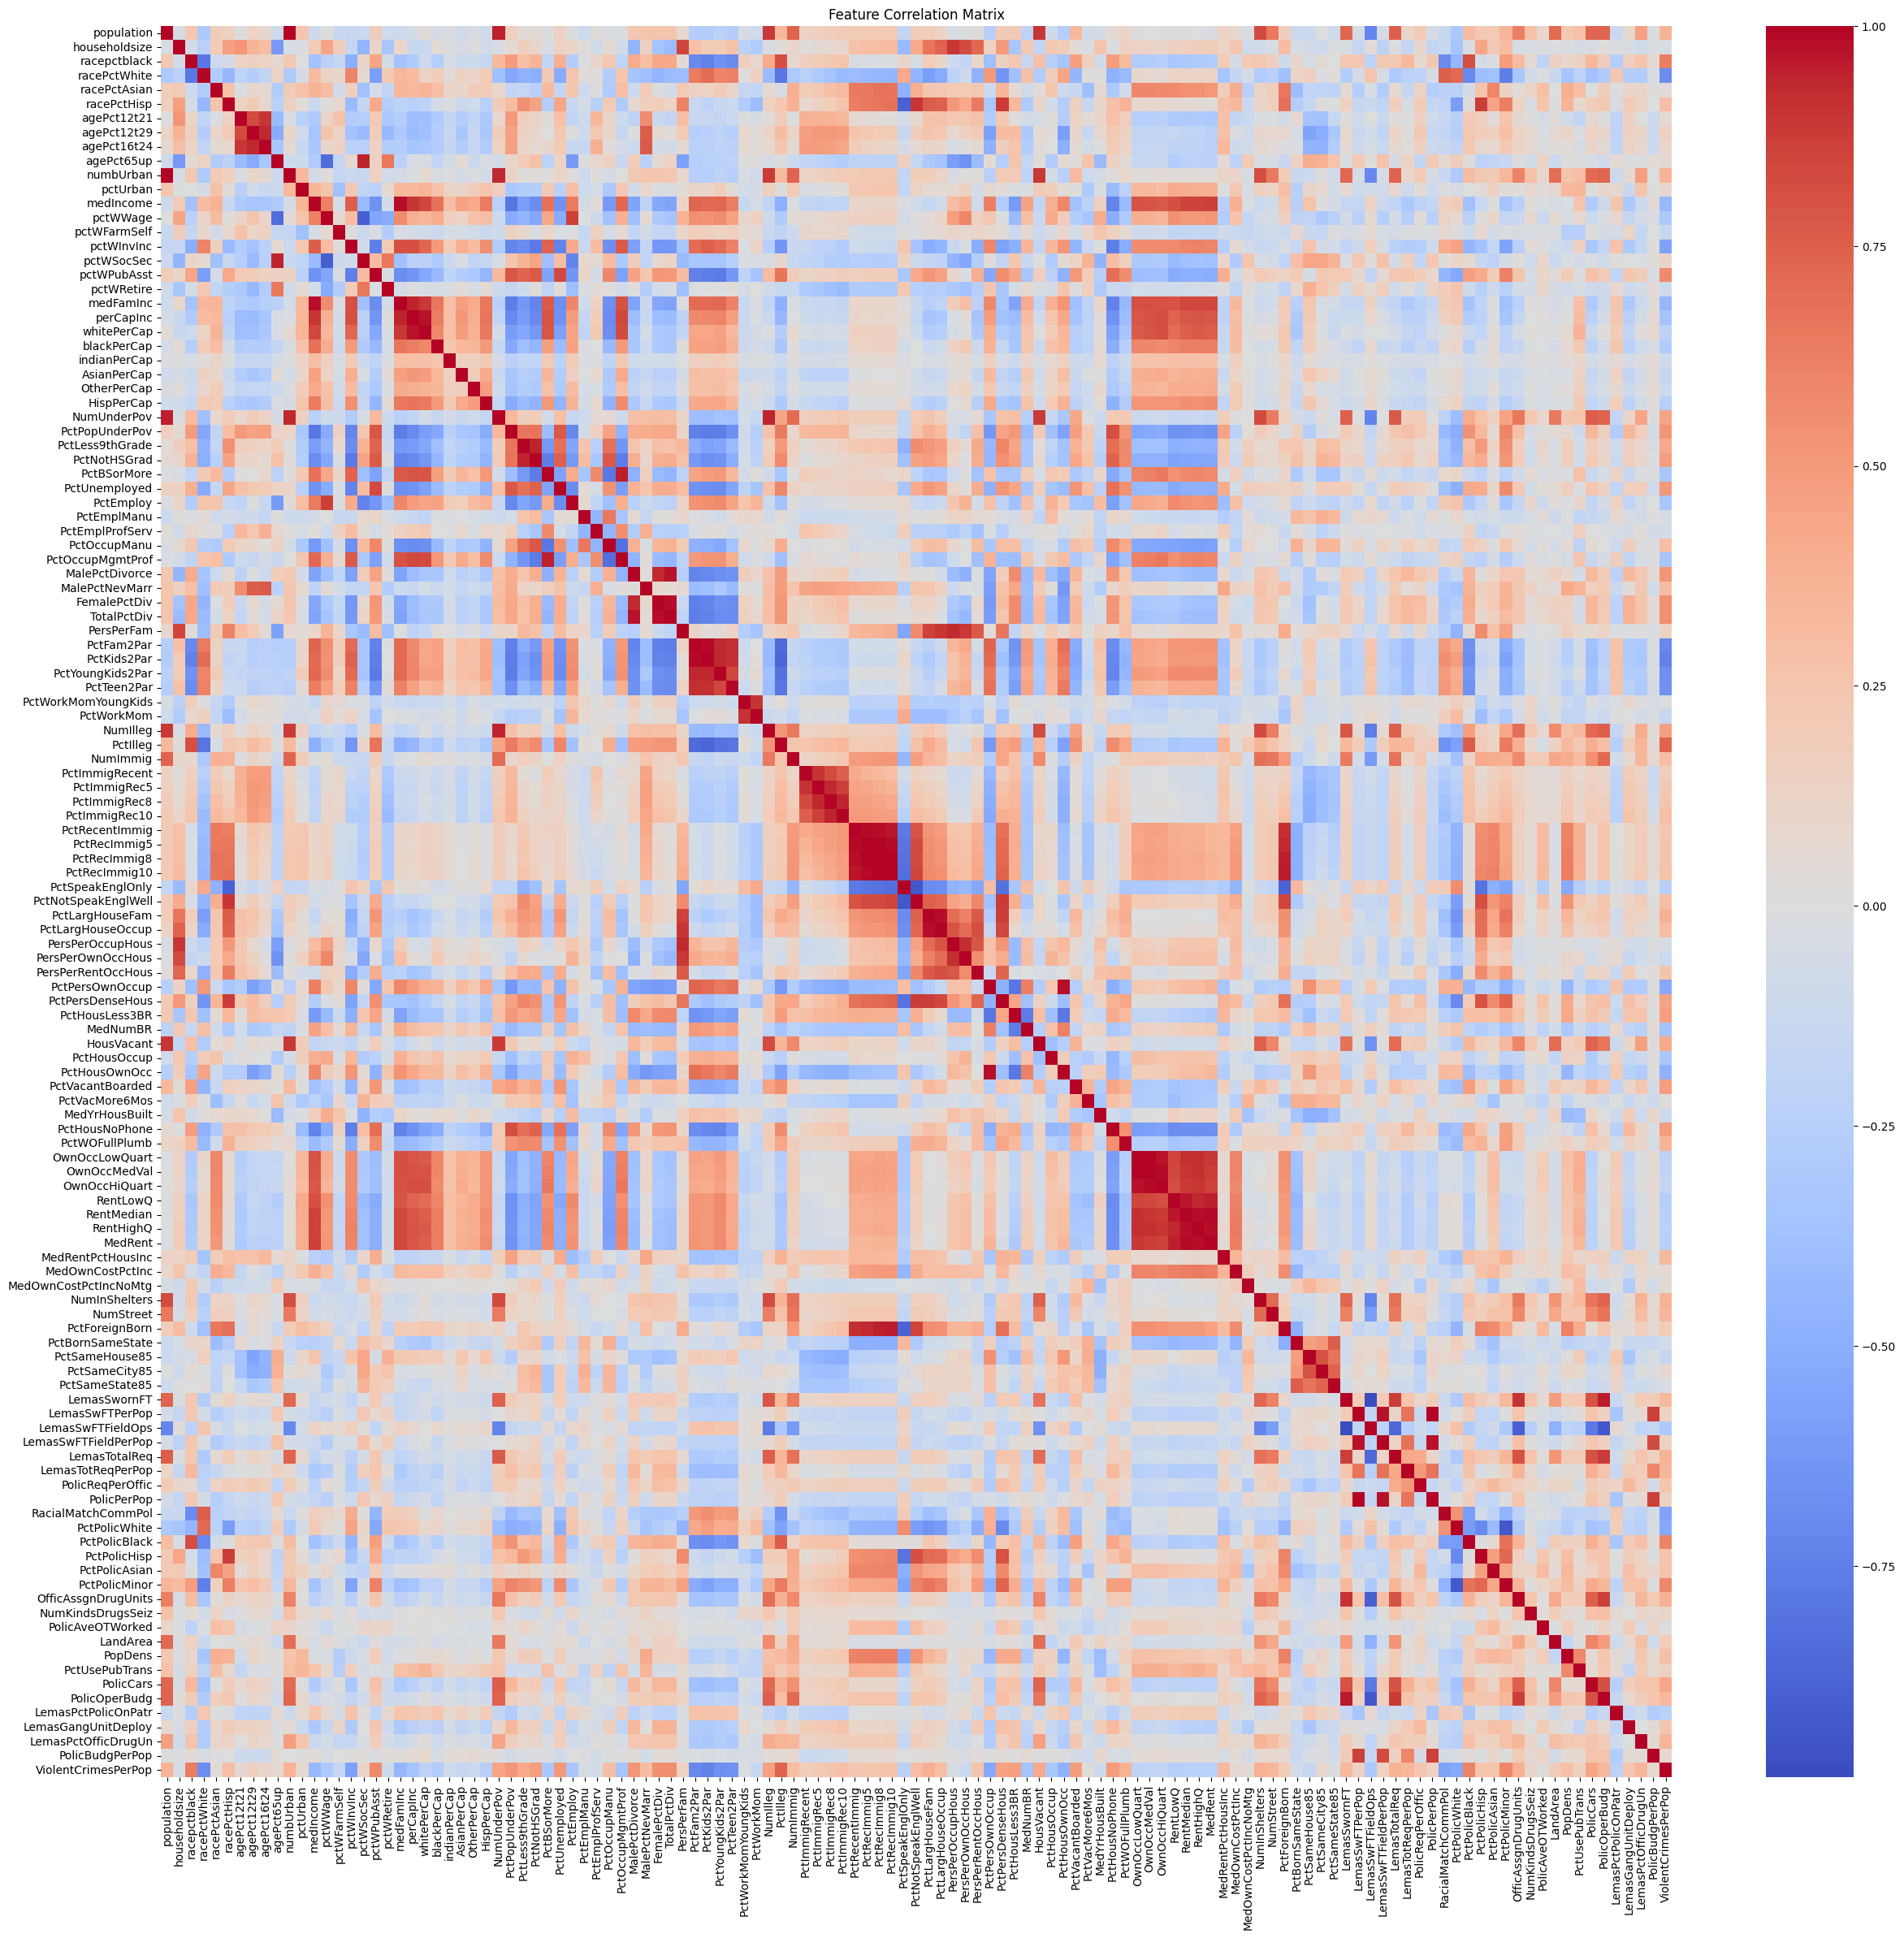

In [102]:
# Here we are plotting the correlation matrix of the features.
corr_matrix = dataset_imputed.corr()

plt.figure(figsize=(30, 28))
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

### (d) Calculate the Coefficient of Variation CV

In [83]:
# Here we are calculating the coefficient of Variation of the features.
cv = dataset_imputed.std() / dataset_imputed.mean()
print(cv.to_string())

population               2.203503
householdsize            0.353298
racepctblack             1.410920
racePctWhite             0.323782
racePctAsian             1.359162
racePctHisp              1.614278
agePct12t21              0.365840
agePct12t29              0.290693
agePct16t24              0.495161
agePct65up               0.423442
numbUrban                2.001744
pctUrban                 0.638849
medIncome                0.579753
pctWWage                 0.327710
pctWFarmSelf             0.700030
pctWInvInc               0.359240
pctWSocSec               0.368513
pctWPubAsst              0.699031
pctWRetire               0.349639
medFamInc                0.527732
perCapInc                0.545633
whitePerCap              0.507552
blackPerCap              0.589469
indianPerCap             0.809685
AsianPerCap              0.606194
OtherPerCap              0.670888
HispPerCap               0.473960
NumUnderPov              2.304970
PctPopUnderPov           0.753980
PctLess9thGrad

### (e) Scatter plots and box plots for highest CV features

In [84]:
# Here we are getting the list of highest CV features
highest_cv_features = cv.nlargest(math.floor(math.sqrt(128)))
highest_cv_features

NumStreet              4.407702
NumInShelters          3.485481
NumIlleg               2.994196
NumImmig               2.900497
LemasPctOfficDrugUn    2.555266
NumUnderPov            2.304970
population             2.203503
numbUrban              2.001744
HousVacant             1.958780
LemasSwornFT           1.929293
PctPolicAsian          1.876027
dtype: float64

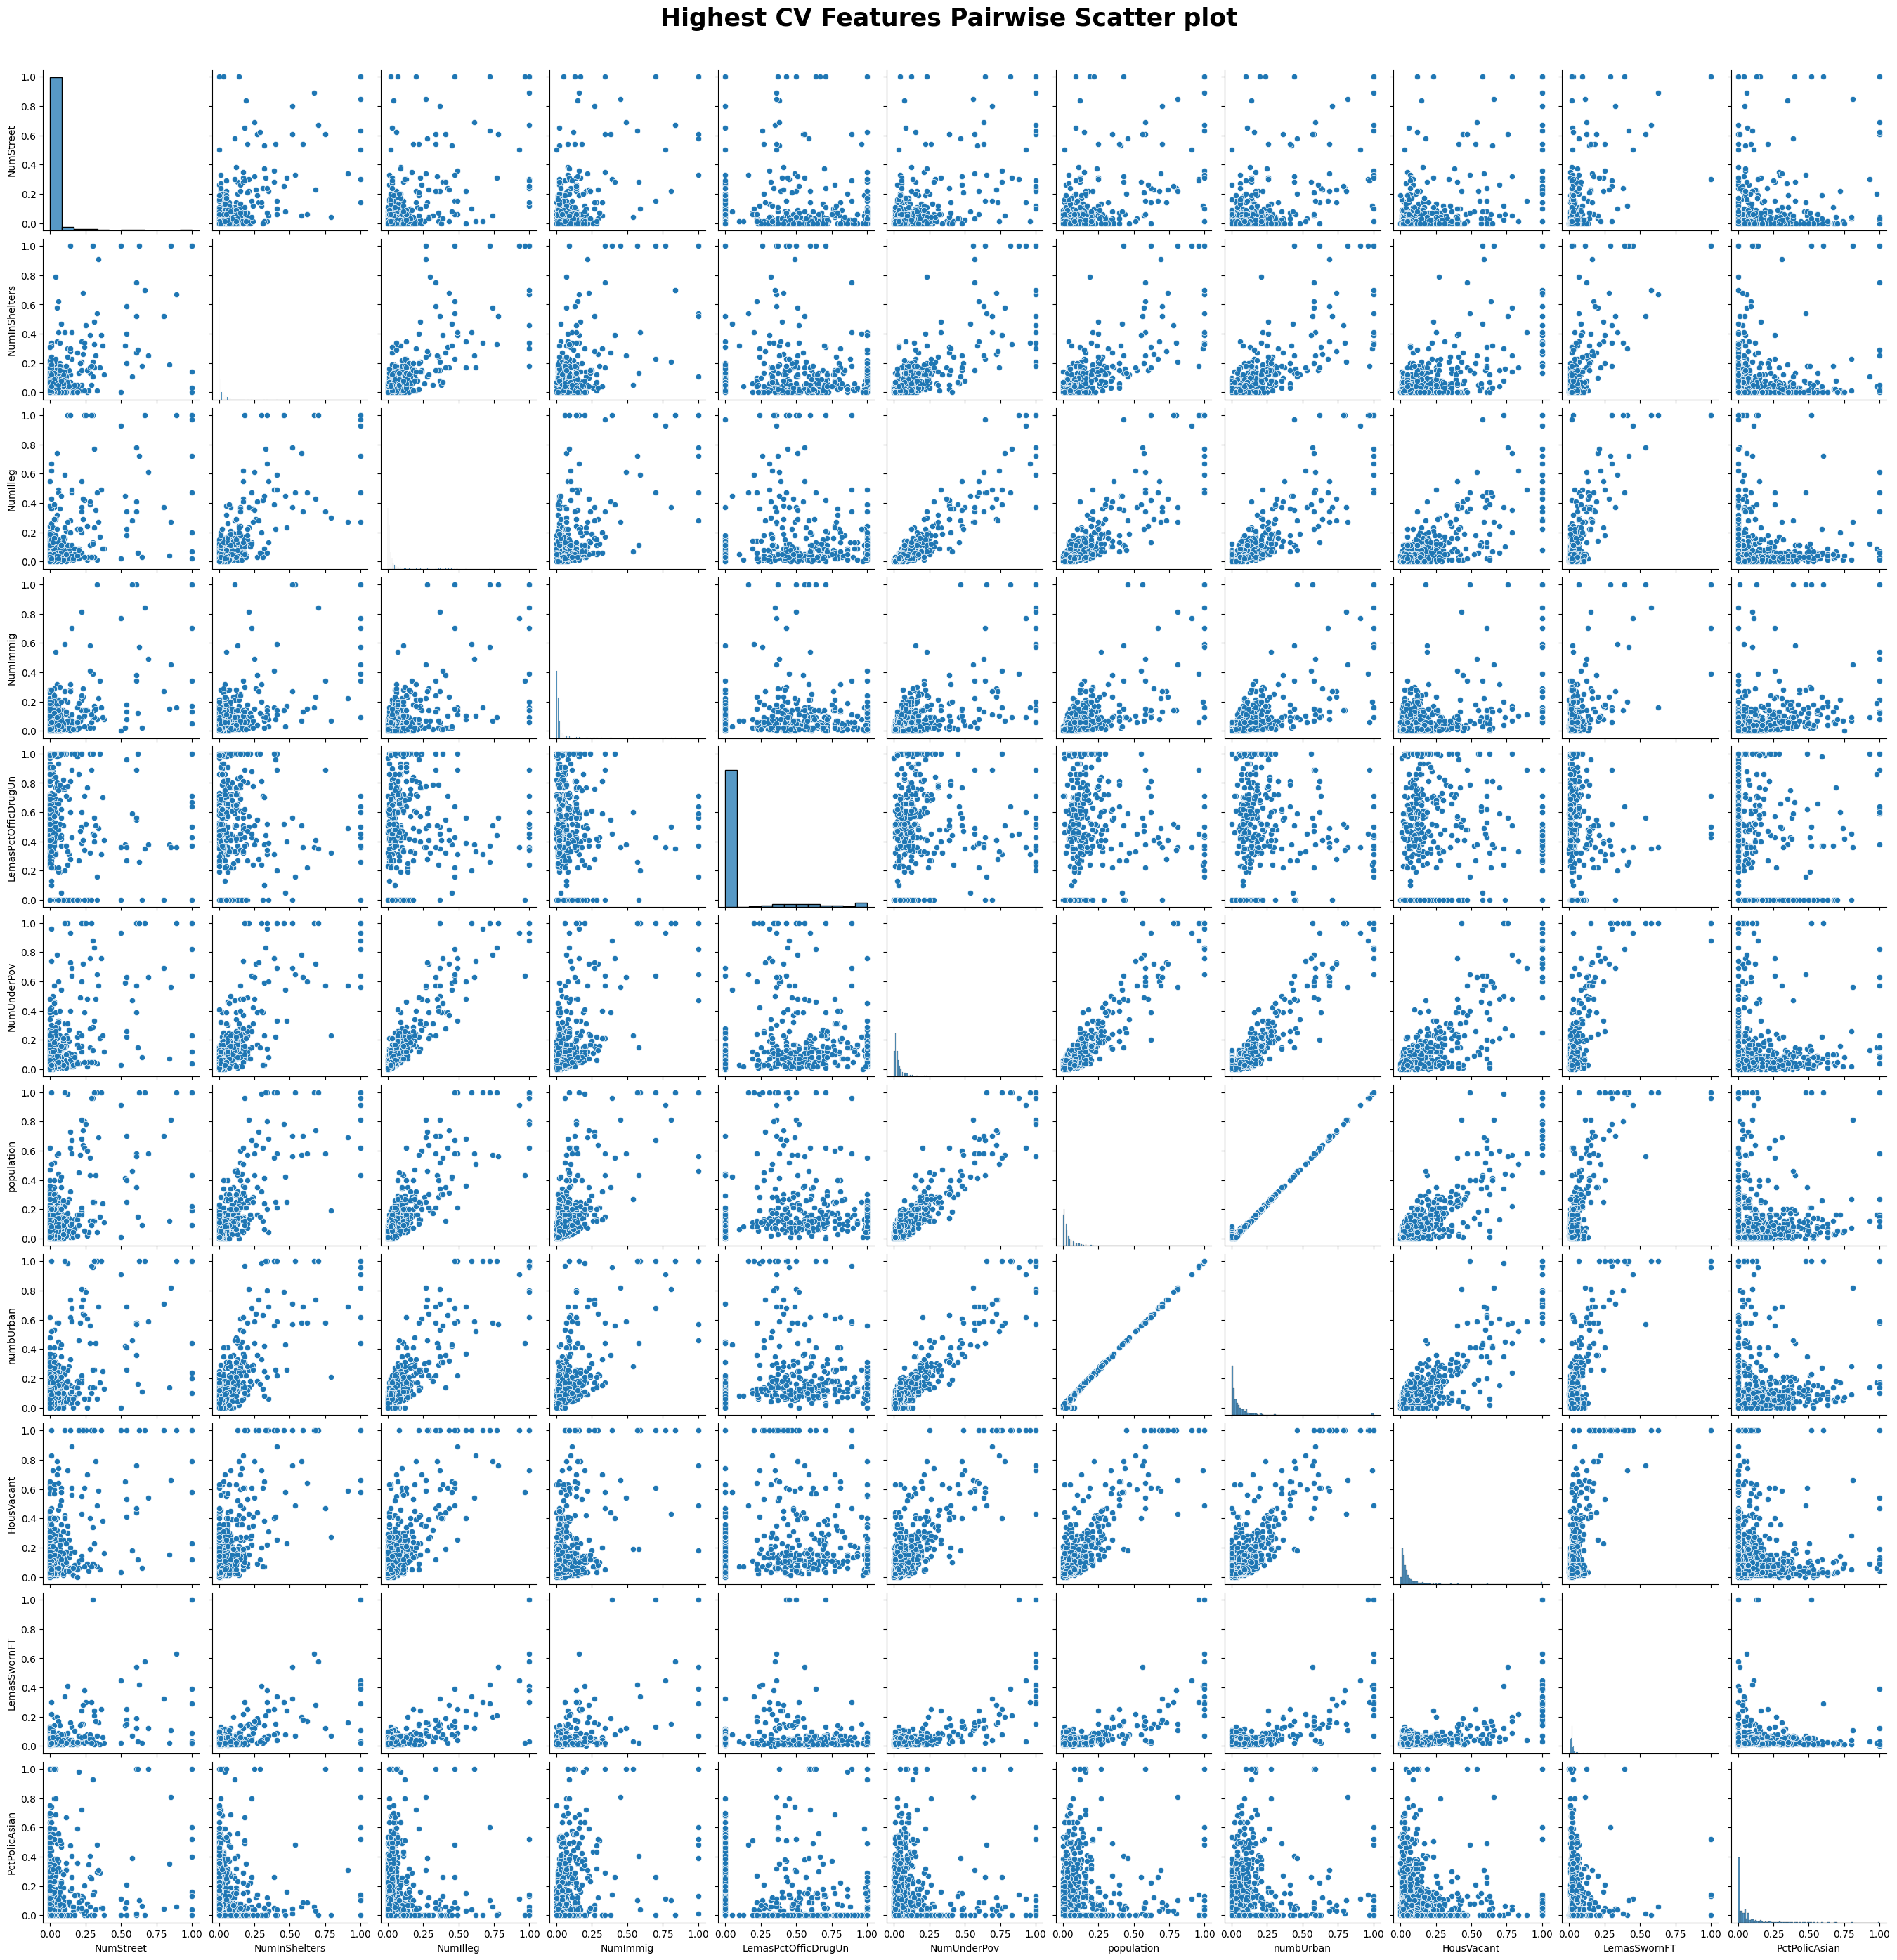

In [85]:
# Here we are plotting a pairwise scatter plot for these features.
sns.pairplot(dataset_imputed[highest_cv_features.index])
plt.suptitle("Highest CV Features Pairwise Scatter plot", y=1.02, fontsize=25, fontweight='bold')
plt.show()

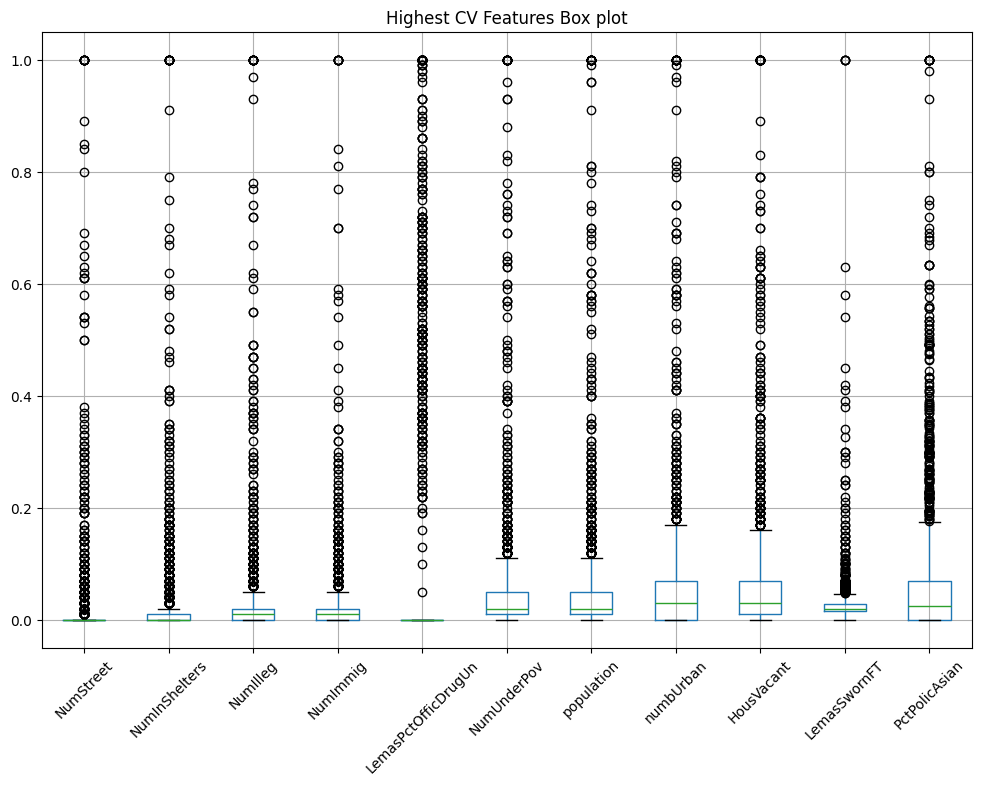

In [86]:
# Here we are plotting a boxplot for this highest cv features.
plt.figure(figsize=(12, 8))
dataset_imputed[highest_cv_features.index].boxplot(rot=45)
plt.title("Highest CV Features Box plot")
plt.show()

Just from looking at the Scatter plot and box plot, I dont think we can determine which feature is significant or not.

### (f) Fit a linear model

In [87]:
train_X = train_set[train_set.columns[:-1]]
train_y = train_set[train_set.columns[-1]]

test_X = test_set[test_set.columns[:-1]]
test_y = test_set[test_set.columns[-1]]

In [88]:
# We are fitting an linear model to our dataset and calculating the mean squared error.
linear_model = LinearRegression()
linear_model.fit(train_X, train_y)

y_pred = linear_model.predict(test_X)

test_err = mean_squared_error(test_y, y_pred)
print(f"Test Mean Squared Error: {test_err:.4f}")

Test Mean Squared Error: 0.0171


### (g) Fit a ridge regression model

In [89]:
# We are fitting an Ridge model to our dataset and calculating the mean squared error. We are choosing the Best value of alpha via cross validation.
# Here we are making a list of alpha values (log scale)
alpha_lst = np.logspace(-4, 4, 50)

ridge_model = RidgeCV(alphas=alpha_lst , cv = KFold(n_splits = 5, random_state = 21, shuffle = True))

ridge_model.fit(train_X, train_y)

best_alpha = ridge_model.alpha_
print(f"Best α (λ): {best_alpha:.4f}")

y_pred = ridge_model.predict(test_X)

# Calculate MSE (test error)
test_err = mean_squared_error(test_y, y_pred)
print(f"Test Mean Squared Error: {test_err:.4f}")

Best α (λ): 2.5595
Test Mean Squared Error: 0.0170


### (h) Fit a LASSO model

In [90]:
# We are fitting an Lasso model to our dataset and calculating the mean squared error. We are choosing the Best value of Lambda via cross validation.
# Here we are trying to case 1) we are not scaling our dataset, 2) we are scaling our dataset using standard scaler.

lasso_model = LassoCV(cv=5, random_state=21, max_iter=10000)
lasso_model.fit(train_X, train_y)

y_pred = lasso_model.predict(test_X)

test_err = mean_squared_error(test_y, y_pred)

# Here we are getting the list of significant features, whose coefficient is greater than 0.
significant_features = train_X.columns[(lasso_model.coef_ != 0)]

print("Test Mean Squared Error: ", test_err)
print("Significant Features: ", significant_features)
print("\n")
# Here we are scaling our dataset using standard Scaler.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_X)
X_test_scaled = scaler.transform(test_X)

lasso_scaled_model = LassoCV(cv=5, random_state=21, max_iter=10000)
lasso_scaled_model.fit(X_train_scaled, train_y)

y_pred_scaled = lasso_scaled_model.predict(X_test_scaled)

test_scaled_err = mean_squared_error(test_y, y_pred_scaled)

significant_scaled_features = train_X.columns[(lasso_scaled_model.coef_ != 0)]

print("Test Scaled Mean Squared Error: ", test_scaled_err)
print("Significant Scaled Features: ", significant_scaled_features)
print("\n")

# 4. Compare the test errors
print(f"\nComparison of Test Errors for 2 Cases:")
print(f"Test Error: {test_err:.4f}")
print(f"Test Scaled Error: {test_scaled_err:.4f}")

Test Mean Squared Error:  0.01723738059149048
Significant Features:  Index(['racepctblack', 'racePctAsian', 'racePctHisp', 'agePct12t21',
       'agePct12t29', 'agePct65up', 'pctUrban', 'pctWWage', 'pctWFarmSelf',
       'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap',
       'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap',
       'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy',
       'PctEmplManu', 'PctEmplProfServ', 'MalePctDivorce', 'MalePctNevMarr',
       'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctWorkMom',
       'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec5',
       'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous',
       'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR',
       'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos',
       'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart',
       'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnC

### (i) Fit a PCR model

In [91]:
# We are fitting an PCR model to our dataset and calculating the mean squared error. We are choosing the (M) Best number of principal components via cross validation.

m_values = range(1, X_train_scaled.shape[1] + 1)
cv_errors = []

# Here we are iterating over the list of possible m values.
for m in m_values:
    pca = PCA(n_components=m)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    pcr_model = LinearRegression()
    pcr_model.fit(X_train_pca, train_y)
    
    cv_error = -cross_val_score(pcr_model, X_train_pca, train_y, cv=5, scoring="neg_mean_squared_error").mean()
    cv_errors.append(cv_error)

best_m = m_values[np.argmin(cv_errors)]
print(f"Best number of principal components (M): {best_m}")

best_pca = PCA(n_components=best_m)
X_train_best_pca = best_pca.fit_transform(X_train_scaled)
X_test_best_pca = best_pca.transform(X_test_scaled)

best_pcr_model = LinearRegression()
best_pcr_model.fit(X_train_best_pca, train_y)

y_best_pred = best_pcr_model.predict(X_test_best_pca)
test_best_err = mean_squared_error(test_y, y_best_pred)

print("Test PCR Error: ", test_best_err)

Best number of principal components (M): 95
Test PCR Error:  0.017768955574997983


### (j) Fit a boosting tree

In [92]:
# We are fitting an XgBoost tree model to our dataset and calculating the mean squared error. We are choosing the best parameters via cross validation.

param_grid = {
    'alpha': np.logspace(-4, 4, 50)
}

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", booster="gbtree", tree_method = "hist", device = "cuda", random_state=21)

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=1)
grid_search.fit(X_train_scaled, train_y)

best_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']


y_pred = best_model.predict(X_test_scaled)

test_err = mean_squared_error(test_y, y_pred)

# Print results
print("Best Alpha (L1 Regularization Term):", best_alpha)
print("Test Mean Squared Error:", test_err)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Alpha (L1 Regularization Term): 1.7575106248547894
Test Mean Squared Error: 0.018153737418208128
